Rank based recommendation system -

In [1]:
import pandas as pd
import numpy as np

## Read Electronics ratings data
electronics_csv = pd.read_csv('/content/ratings_Electronics.csv',header='infer')


In [2]:
# Rename the columns
electronics_csv.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] #Adding column names

electronics_csv = electronics_csv.drop('timestamp', axis=1) #Dropping timestamp
electronics_csv_copy = electronics_csv.copy(deep=True) #Copying the data to another dataframe

In [3]:
electronics_csv.head()

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


#### EDA For the dataset


###### Shape of Data

In [4]:
rows, columns = electronics_csv.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  4864992
No of columns =  3


Data Types of Data

In [5]:
electronics_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4864992 entries, 0 to 4864991
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 111.4+ MB


Missing value analysis

In [6]:

# Find number of missing values in each column
electronics_csv.isna().sum()

,0
user_id,0
prod_id,0
rating,1


In [7]:

# Summary statistics of 'rating' variable
electronics_csv['rating'].describe()


,rating
count,4.864991e+06
mean,3.984470e+00
std,1.398462e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


<Axes: xlabel='rating'>

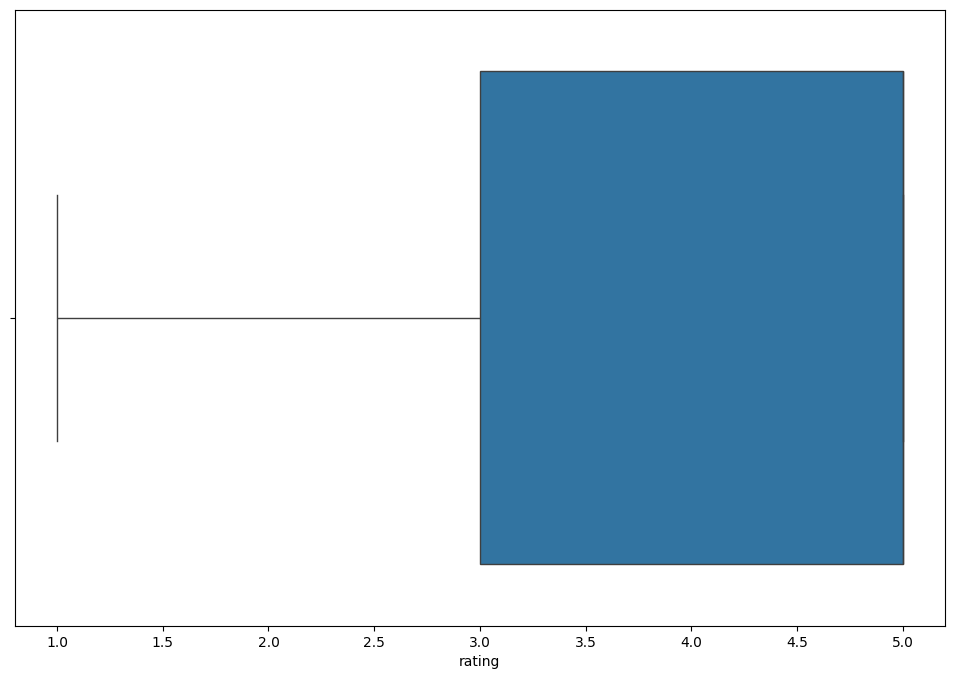

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

 # Create the box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x=electronics_csv['rating'])



In [9]:
rating_gt_5 = electronics_csv[electronics_csv['rating'] > 5]
rating_gt_5.head()

,user_id,prod_id,rating


In [10]:
electronics_csv = electronics_csv[electronics_csv['rating'] <= 5]
electronics_csv.head()

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [11]:
# Summary statistics of 'rating' variable
electronics_csv['rating'].describe()

,rating
count,4.864991e+06
mean,3.984470e+00
std,1.398462e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


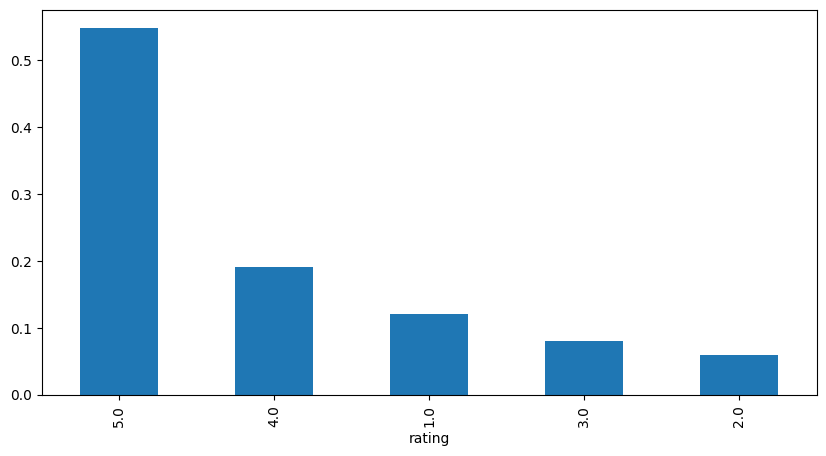

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


#Create the plot and provide observations

plt.figure(figsize = (10,5))
electronics_csv['rating'].value_counts(1).plot(kind='bar')
plt.show()

The distribution is right skewed. Most of the ratings like 50% of ratings are 5 and it is decreasing towards left with 20% of them rating 2

In [13]:
# Number of unique user id and product id in the data
print('Number of unique users = ', electronics_csv['user_id'].nunique())
print('Number of unique products = ', electronics_csv['prod_id'].nunique())

Number of unique users =  2865941
Number of unique products =  268300


Pre-Processing
Let's take a subset of the dataset (by only keeping the users who have given 50 or more ratings) to make the dataset less sparse and easy to work with.

In [14]:
electronics_csv['rating'].describe()

,rating
count,4.864991e+06
mean,3.984470e+00
std,1.398462e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [15]:
counts = electronics_csv['user_id'].value_counts()
electronics_csv_final = electronics_csv[electronics_csv['user_id'].isin(counts[counts >= 30].index)]

In [16]:
print('The number of observations in the final data =', len(electronics_csv_final))
print('Number of unique users in the final data = ', electronics_csv_final['user_id'].nunique())
print('Number of unique products in the final data = ', electronics_csv_final['prod_id'].nunique())

The number of observations in the final data = 104846
Number of unique users in the final data =  2185
Number of unique products in the final data =  41081


In [17]:
# Top 10 users based on rating
most_rated = electronics_csv_final.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated


,0
user_id,
A5JLAU2ARJ0BO,491
A6FIAB28IS79,393
A3OXHLG6DIBRW8,364
ADLVFFE4VBT8,296
A680RUE1FDO8B,294
A231WM2Z2JL0U3,252
A203OCQQ12MAVT,232
A2AY4YUOX2N1BQ,231
A250AXLRBVYKB4,213


In [18]:
electronics_csv_final.head()

,user_id,prod_id,rating
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
199,A3BMUBUC1N77U8,0972683275,4.0


In [19]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = electronics_csv_final.pivot(index = 'user_id', columns ='prod_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()


Shape of final_ratings_matrix:  (2185, 41081)
given_num_of_ratings =  104846
possible_num_of_ratings =  89761985
density: 0.12%


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B005DMBUZY,B005DMC2Z6,B005DMFDKW,B005DMUCV2,B005DMX1OM,B005DMZKZA,B005DNBMGU,B005DNSEZ2,B005DO69T4,B005DOK8NW
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A107CTGSINY3GJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
electronics_csv_final.shape

(104846, 3)

Rank Based Recommendation System

In [21]:
electronics_csv_final.head()

,user_id,prod_id,rating
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
199,A3BMUBUC1N77U8,0972683275,4.0


In [22]:
#Calculate the average rating for each product
average_rating = electronics_csv_final.groupby('prod_id')['rating'].mean()
average_rating

,rating
prod_id,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.444444
1400501466,3.666667
...,...
B005DMZKZA,2.000000
B005DNBMGU,4.000000
B005DNSEZ2,5.000000


In [23]:

#Calculate the count of ratings for each product
count_rating = electronics_csv_final.groupby('prod_id')['rating'].count()
count_rating

,rating
prod_id,
0594451647,1
0594481813,1
0970407998,2
0972683275,9
1400501466,6
...,...
B005DMZKZA,1
B005DNBMGU,1
B005DNSEZ2,1


In [24]:
#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

,avg_rating,rating_count
prod_id,,
0594451647,5.0,1
B001HOYZV8,5.0,1
B001J2KG52,5.0,1
B001IZZ35I,5.0,1
B001IZGZVO,5.0,1


In [25]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

In [26]:
# Recommending top 5 products with 50 minimum interactions  based on popularity

list(top_n_products(final_rating, 5, 50))

['B0052SCU8U', 'B001TH7GUU', 'B001TH7T2U', 'B0000BZL1P', 'B003ES5ZUU']

In [27]:
#Recommending top 5 products with 100 minimum interactions based on popularity

list(top_n_products(final_rating, 5, 100))

['B003ES5ZUU', 'B0019EHU8G', 'B000N99BBC', 'B000QUUFRW', 'B002V88HFE']